In [77]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('cities_r2.csv')
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [96]:
X = df[["effective_literacy_rate_total", "0-6_population_total"]]

# X = X.values.reshape(-1, 1)

X.shape

(493, 2)

In [97]:
scores = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  scores.append(kmeans.inertia_)

scores

[5427185354708.864,
 1589325173157.179,
 780165252666.3767,
 426573058314.1379,
 270089240554.6861,
 182991986903.5652,
 132610458436.77887,
 99812789677.03667,
 59855097570.583176,
 47901074191.20057]

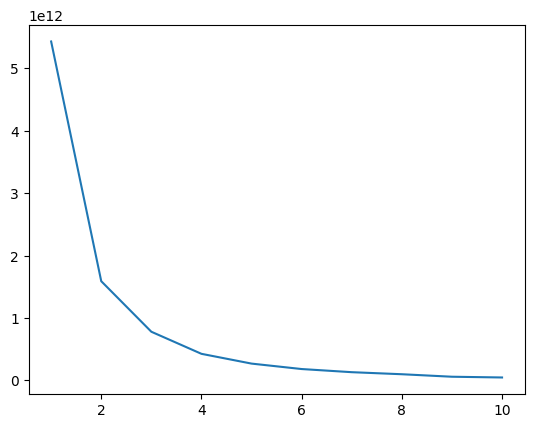

In [98]:
plt.plot(range(1, 11), scores)

In [99]:
km = KMeans(n_clusters=6, init='k-means++', random_state=42)
km.fit(X)
pred = km.predict(X)

In [83]:
pred

array([3, 4, 3, 0, 5, 4, 2, 1, 4, 4, 1, 3, 4, 4, 4, 5, 1, 1, 1, 1, 1, 4,
       1, 1, 4, 1, 0, 2, 4, 0, 3, 0, 0, 4, 1, 1, 1, 1, 4, 2, 1, 1, 4, 5,
       1, 1, 1, 0, 4, 4, 0, 1, 1, 1, 3, 4, 4, 3, 1, 5, 1, 3, 1, 1, 1, 0,
       0, 0, 1, 3, 4, 3, 1, 0, 4, 3, 1, 1, 3, 3, 0, 1, 1, 0, 1, 0, 0, 0,
       3, 0, 0, 0, 4, 1, 4, 1, 1, 4, 5, 0, 3, 1, 0, 4, 0, 4, 5, 3, 0, 1,
       0, 0, 0, 4, 5, 1, 4, 3, 0, 4, 0, 4, 1, 5, 1, 0, 1, 5, 4, 1, 4, 5,
       0, 1, 3, 4, 3, 0, 3, 1, 0, 1, 4, 1, 0, 1, 1, 3, 5, 3, 1, 1, 1, 3,
       4, 4, 1, 1, 5, 0, 1, 1, 0, 1, 0, 5, 3, 5, 3, 0, 0, 4, 0, 3, 3, 1,
       0, 1, 1, 0, 3, 1, 4, 1, 0, 4, 1, 0, 0, 0, 5, 3, 1, 4, 0, 4, 3, 1,
       0, 1, 3, 1, 5, 1, 0, 4, 0, 3, 4, 3, 3, 4, 3, 1, 1, 3, 1, 1, 4, 1,
       4, 1, 1, 1, 0, 0, 0, 1, 0, 4, 1, 1, 0, 1, 5, 0, 3, 0, 0, 5, 0, 0,
       1, 3, 3, 3, 1, 1, 1, 1, 4, 0, 3, 4, 0, 1, 1, 3, 0, 3, 0, 1, 0, 1,
       4, 0, 1, 5, 3, 5, 3, 4, 0, 4, 1, 4, 0, 0, 4, 4, 3, 4, 4, 3, 0, 0,
       1, 5, 0, 0, 0, 3, 4, 4, 4, 0, 4, 0, 1, 1, 5,

In [85]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,cluster
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,3
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,4
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,3
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,0
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,5


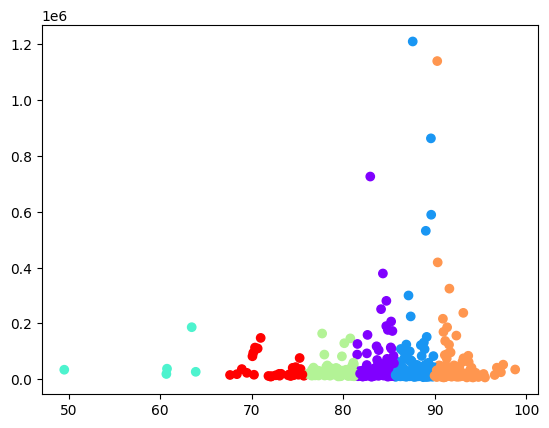

In [101]:
plt.scatter(df['effective_literacy_rate_total'], df['0-6_population_total'], c=df['cluster'], cmap='rainbow')
# plt.xlabel("effective_literacy_rate_total")
# plt.ylabel("clusters")
plt.show()

Cluster labels for each point: [0 0 0 0 1 0 1 1]
P6 belongs to Cluster 1
Population around m2 (Cluster 2): 3
Updated value of m1: [0.148 0.712]
Updated value of m2: [0.24666667 0.2       ]


TypeError: 'str' object is not callable

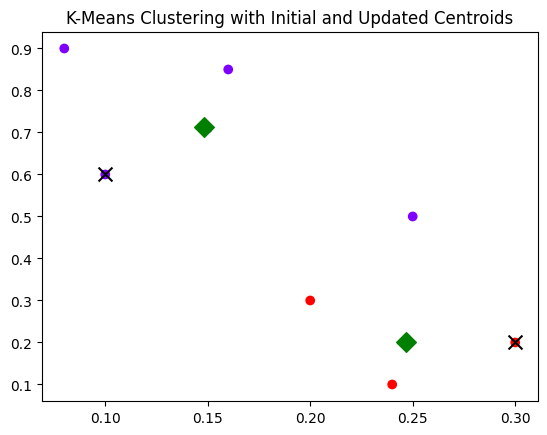

In [102]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the points as numpy array
points = np.array([
    [0.1, 0.6],  # P1
    [0.15, 0.71],  # P2
    [0.08, 0.9],  # P3
    [0.16, 0.85],  # P4
    [0.2, 0.3],  # P5
    [0.25, 0.5],  # P6
    [0.24, 0.1],  # P7
    [0.3, 0.2]    # P8
])

# Set the initial centroids (m1 = P1 and m2 = P8)
initial_centroids = np.array([
    points[0],  # m1
    points[7]   # m2
])

# Perform KMeans clustering with predefined centroids
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, max_iter=100, random_state=42)
kmeans.fit(points)

# Print cluster labels for each point
labels = kmeans.labels_
print("Cluster labels for each point:", labels)

# Answers to specific questions
# 1. Which cluster does P6 belong to?
p6_cluster = labels[5]
print(f"P6 belongs to Cluster {p6_cluster + 1}")

# 2. What is the population of the cluster around m2?
cluster_2_population = sum(labels == 1)  # Assuming m2 corresponds to Cluster 2
print(f"Population around m2 (Cluster 2): {cluster_2_population}")

# 3. What are the updated centroids?
new_m1, new_m2 = kmeans.cluster_centers_
print("Updated value of m1:", new_m1)
print("Updated value of m2:", new_m2)

# Visualize the points and clusters
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='rainbow', marker='o', label='Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], color='black', marker='x', s=100, label='Initial Centroids')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='green', marker='D', s=100, label='Updated Centroids')
plt.title("K-Means Clustering with Initial and Updated Centroids")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend()
plt.show()
